<a href="https://colab.research.google.com/github/OhJin-Soo/ktb_ai/blob/main/jayvi(%EC%98%A4%EC%A7%84%EC%88%98)_ktb_6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_1~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nabihazahid_spotify_dataset_for_churn_analysis_path = kagglehub.dataset_download('nabihazahid/spotify-dataset-for-churn-analysis')

print('Data source import complete.')


Using Colab cache for faster access to the 'spotify-dataset-for-churn-analysis' dataset.
Data source import complete.


In [58]:
import pandas as pd
import numpy as np

## EDA

In [59]:
df = pd.read_csv("/kaggle/input/spotify-dataset-for-churn-analysis/spotify_churn_dataset.csv")
df.head(5)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [60]:
df["is_churned"].value_counts()

,count
is_churned,
0,5929
1,2071


In [61]:
df_new = df.drop(["user_id"], axis=1)
df_new.head(5)

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [62]:
df_encoded = pd.get_dummies(df_new, columns = ["country","gender","subscription_type","device_type"])
df_encoded.head(5)

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,country_AU,country_CA,country_DE,...,gender_Female,gender_Male,gender_Other,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web
0,54,26,23,0.20,31,0,1,False,True,False,...,True,False,False,False,True,False,False,True,False,False
1,33,141,62,0.34,0,1,0,False,False,True,...,False,False,True,True,False,False,False,False,False,True
2,38,199,38,0.04,0,1,1,True,False,False,...,False,True,False,False,False,True,False,False,True,False
3,22,36,2,0.31,0,1,0,False,True,False,...,True,False,False,False,False,False,True,False,True,False
4,29,250,57,0.36,0,1,1,False,False,False,...,False,False,True,True,False,False,False,False,True,False


In [63]:
df_encoded.corr()["is_churned"]

,is_churned
age,0.003982
listening_time,-0.007624
songs_played_per_day,0.009314
skip_rate,0.016121
ads_listened_per_week,-0.002279
offline_listening,0.012754
is_churned,1.000000
country_AU,-0.001426
country_CA,-0.008776
country_DE,0.012211


## KNN 실험

## 정규화 X, 파라미터 실험

In [64]:
x = df_encoded.drop(["is_churned"],axis=1)
y = df_encoded["is_churned"]

In [65]:
from sklearn.model_selection import train_test_split

# 8 : 1 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.5, random_state=42)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metric_list = ["manhattan", "cityblock", "cosine", "euclidean", "l1", "l2", "nan_euclidean"]
k_list = [1, 2, 3, 4, 5]

results = []  # 결과를 저장할 리스트

for metric in metric_list:
    for k in k_list:
        # 모델 생성
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # 모델 학습
        knn.fit(x_train, y_train)

        # 예측
        y_pred = knn.predict(x_test)

        # 정확도 계산
        accuracy = accuracy_score(y_test, y_pred)

        # 결과 출력
        print(f"metric={metric:<15} | k={k:<2} | accuracy={accuracy:.4f}")

        # 결과 저장
        results.append((metric, k, accuracy))

metric=manhattan       | k=1  | accuracy=0.5950
metric=manhattan       | k=2  | accuracy=0.6975
metric=manhattan       | k=3  | accuracy=0.6575
metric=manhattan       | k=4  | accuracy=0.7125
metric=manhattan       | k=5  | accuracy=0.6787
metric=cityblock       | k=1  | accuracy=0.5950
metric=cityblock       | k=2  | accuracy=0.6975
metric=cityblock       | k=3  | accuracy=0.6575
metric=cityblock       | k=4  | accuracy=0.7125
metric=cityblock       | k=5  | accuracy=0.6787
metric=cosine          | k=1  | accuracy=0.6112
metric=cosine          | k=2  | accuracy=0.7100
metric=cosine          | k=3  | accuracy=0.6562
metric=cosine          | k=4  | accuracy=0.7000
metric=cosine          | k=5  | accuracy=0.6663
metric=euclidean       | k=1  | accuracy=0.6088
metric=euclidean       | k=2  | accuracy=0.7013
metric=euclidean       | k=3  | accuracy=0.6538
metric=euclidean       | k=4  | accuracy=0.7075
metric=euclidean       | k=5  | accuracy=0.6750
metric=l1              | k=1  | accuracy

## 정규화 O, 파라미터 실험

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

num_cols = x.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler() # 정규화
x[num_cols] = scaler.fit_transform(x[num_cols])

# 8 : 1 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.5, random_state=42)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metric_list = ["manhattan", "cityblock", "cosine", "euclidean", "l1", "l2", "nan_euclidean"]
k_list = [1, 2, 3, 4, 5]

results = []  # 결과를 저장할 리스트

for metric in metric_list:
    for k in k_list:
        # 모델 생성
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # 모델 학습
        knn.fit(x_train, y_train)

        # 예측
        y_pred = knn.predict(x_test)

        # 정확도 계산
        accuracy = accuracy_score(y_test, y_pred)

        # 결과 출력
        print(f"metric={metric:<15} | k={k:<2} | accuracy={accuracy:.4f}")

        # 결과 저장
        results.append((metric, k, accuracy))

metric=manhattan       | k=1  | accuracy=0.6312
metric=manhattan       | k=2  | accuracy=0.7188
metric=manhattan       | k=3  | accuracy=0.6813
metric=manhattan       | k=4  | accuracy=0.7250
metric=manhattan       | k=5  | accuracy=0.6913
metric=cityblock       | k=1  | accuracy=0.6312
metric=cityblock       | k=2  | accuracy=0.7188
metric=cityblock       | k=3  | accuracy=0.6813
metric=cityblock       | k=4  | accuracy=0.7250
metric=cityblock       | k=5  | accuracy=0.6913
metric=cosine          | k=1  | accuracy=0.6188
metric=cosine          | k=2  | accuracy=0.7013
metric=cosine          | k=3  | accuracy=0.6675
metric=cosine          | k=4  | accuracy=0.7025
metric=cosine          | k=5  | accuracy=0.6875
metric=euclidean       | k=1  | accuracy=0.6225
metric=euclidean       | k=2  | accuracy=0.7050
metric=euclidean       | k=3  | accuracy=0.6737
metric=euclidean       | k=4  | accuracy=0.7125
metric=euclidean       | k=5  | accuracy=0.6900
metric=l1              | k=1  | accuracy

## 여러 모델 실험

## Perceptron

# 7 : 2 : 1

In [69]:
from sklearn.model_selection import train_test_split

# 7 : 2 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.66, random_state=42)

Perceptron 훈련 정확도:  0.5669642857142857
Perceptron 검증 정확도: 0.5587121212121212
Perceptron 테스트 정확도: 0.5355392156862745


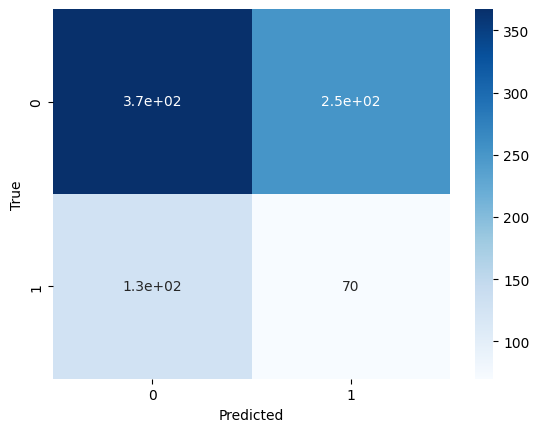

In [70]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 생성
pt = Perceptron()

# 학습
pt.fit(x_train, y_train)

print("Perceptron 훈련 정확도: ",pt.score(x_train,y_train))
print("Perceptron 검증 정확도:",pt.score(x_valid,y_valid))
print("Perceptron 테스트 정확도:",pt.score(x_test,y_test))

y_pred = pt.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 8 : 1 : 1

In [71]:
from sklearn.model_selection import train_test_split

# 8 : 1 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.5, random_state=42)

Perceptron 훈련 정확도:  0.66921875
Perceptron 검증 정확도: 0.68
Perceptron 테스트 정확도: 0.68


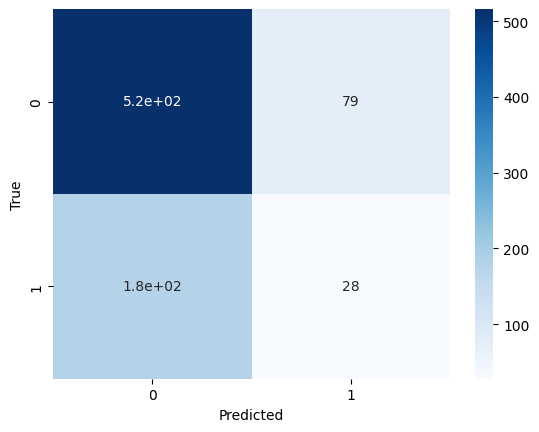

In [72]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 생성
pt = Perceptron()

# 학습
pt.fit(x_train, y_train)

print("Perceptron 훈련 정확도: ",pt.score(x_train,y_train))
print("Perceptron 검증 정확도:",pt.score(x_valid,y_valid))
print("Perceptron 테스트 정확도:",pt.score(x_test,y_test))

y_pred = pt.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## SVM

# 7 : 2 : 1

In [85]:
from sklearn.model_selection import train_test_split

# 7 : 2 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.66, random_state=42)

SVM 훈련 정확도: 0.9583928571428572
SVM 검증 정확도: 0.6647727272727273
SVM 테스트 정확도: 0.6580882352941176


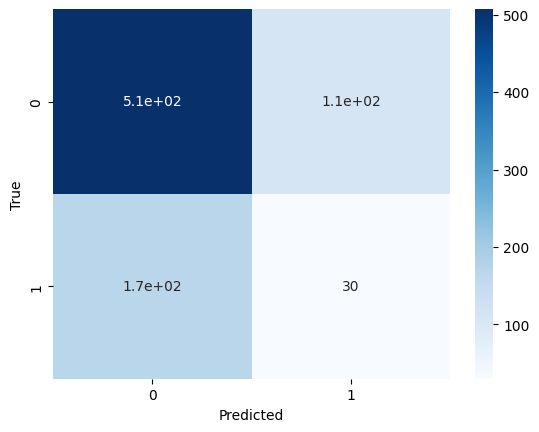

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=5, random_state=42)

rf.fit(x_train, y_train)

print("SVM 훈련 정확도:",rf.score(x_train,y_train))
print("SVM 검증 정확도:",rf.score(x_valid,y_valid))
print("SVM 테스트 정확도:",rf.score(x_test,y_test))

y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 8 : 1 : 1

In [87]:
from sklearn.model_selection import train_test_split

# 8 : 1 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.5, random_state=42)

SVM 훈련 정확도: 0.73890625
SVM 검증 정확도: 0.75625
SVM 테스트 정확도: 0.74375


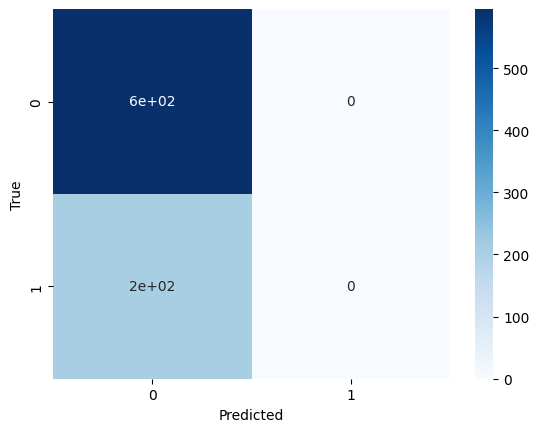

In [88]:
from sklearn.svm import SVC

# 모델 생성 (기본 커널: RBF)
svm = SVC()

# 학습
svm.fit(x_train, y_train)

print("SVM 훈련 정확도:",svm.score(x_train,y_train))
print("SVM 검증 정확도:",svm.score(x_valid,y_valid))
print("SVM 테스트 정확도:",svm.score(x_test,y_test))

y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## RandomForest

# 7 : 2 : 1

In [89]:
from sklearn.model_selection import train_test_split

# 7 : 2 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.66, random_state=42)

RandomForest 훈련 정확도: 0.9583928571428572
RandomForest 검증 정확도: 0.6647727272727273
RandomForest 테스트 정확도: 0.6580882352941176


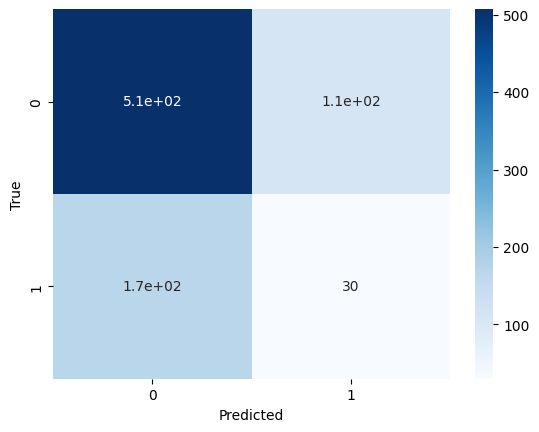

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=5, random_state=42)

rf.fit(x_train, y_train)

print("RandomForest 훈련 정확도:",rf.score(x_train,y_train))
print("RandomForest 검증 정확도:",rf.score(x_valid,y_valid))
print("RandomForest 테스트 정확도:",rf.score(x_test,y_test))

y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 8 : 1 : 1

In [91]:
from sklearn.model_selection import train_test_split

# 8 : 1 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.5, random_state=42)

RandomForest 훈련 정확도: 0.95828125
RandomForest 검증 정확도: 0.6825
RandomForest 테스트 정확도: 0.67375


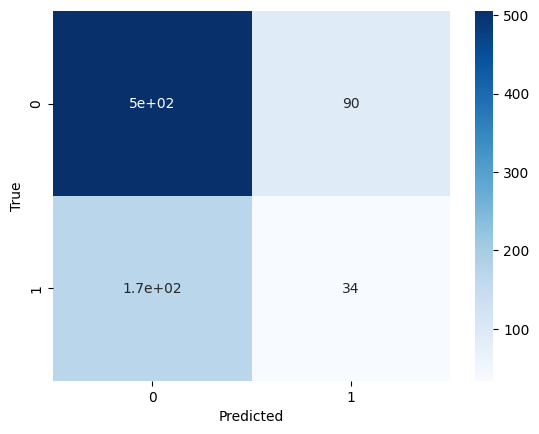

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=5, random_state=42)

rf.fit(x_train, y_train)

print("RandomForest 훈련 정확도:",rf.score(x_train,y_train))
print("RandomForest 검증 정확도:",rf.score(x_valid,y_valid))
print("RandomForest 테스트 정확도:",rf.score(x_test,y_test))

y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Naive Bayes

# 7 : 2 : 1

In [93]:
from sklearn.model_selection import train_test_split

# 7 : 2 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.66, random_state=42)

Naive Bayes 훈련 정확도: 0.7376785714285714
Naive Bayes 검증 정확도: 0.7443181818181818
Naive Bayes 테스트 정확도: 0.758578431372549


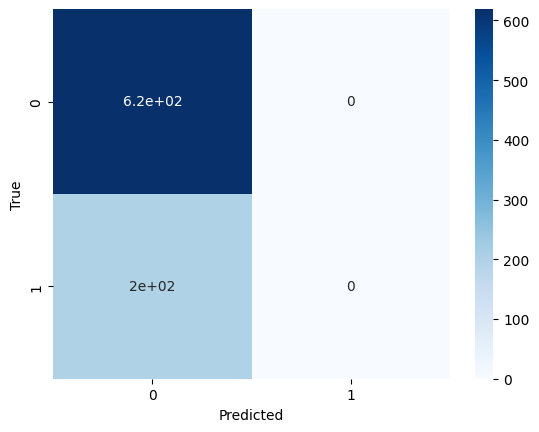

In [94]:
from sklearn.naive_bayes import GaussianNB

# 모델 생성
nb = GaussianNB()

# 학습
nb.fit(x_train, y_train)

# 예측
y_pred = nb.predict(x_test)

print("Naive Bayes 훈련 정확도:",nb.score(x_train,y_train))
print("Naive Bayes 검증 정확도:",nb.score(x_valid,y_valid))
print("Naive Bayes 테스트 정확도:",nb.score(x_test,y_test))

y_pred = nb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 8 : 1 : 1

In [95]:
from sklearn.model_selection import train_test_split

# 8 : 1 : 1
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)
x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,train_size = 0.5, random_state=42)

Naive Bayes 훈련 정확도: 0.73890625
Naive Bayes 검증 정확도: 0.75625
Naive Bayes 테스트 정확도: 0.74375


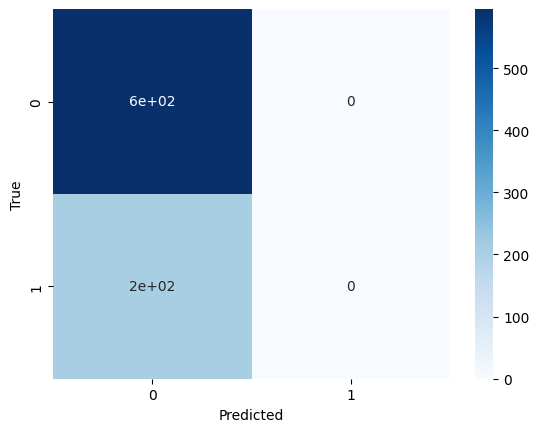

In [96]:
from sklearn.naive_bayes import GaussianNB

# 모델 생성
nb = GaussianNB()

# 학습
nb.fit(x_train, y_train)

# 예측
y_pred = nb.predict(x_test)

print("Naive Bayes 훈련 정확도:",nb.score(x_train,y_train))
print("Naive Bayes 검증 정확도:",nb.score(x_valid,y_valid))
print("Naive Bayes 테스트 정확도:",nb.score(x_test,y_test))

y_pred = nb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()